ZoomInfo Churn Reduction Case Study
Goal: Develop actionable insights and recommendations for ZoomInfo customer experience team

In [21]:
import pandas as pd

def load_data():
    """
    Load the data dictionary and the main dataset from an Excel file.

    Returns:
    tuple: a tuple containing the data dictionary and the main dataset
    """
    # Load the data dictionary
    data_dict = pd.read_excel(
        '../data/churn_data.xlsx', sheet_name='Data Dict', index_col=None, header=1
    )
    data_dict = data_dict.drop(data_dict.columns[0], axis=1)
    data_dict = data_dict.rename(columns={'Discerption':'Description'})

    # Load the main dataset
    df = pd.read_excel('../data/churn_data.xlsx', sheet_name='E Comm', header=0)

    return data_dict, df

data_dict, df = load_data()


In [22]:
data_dict

,Data,Variable,Description
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [23]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [24]:
nulls = df.isnull().sum()
nulls_df = nulls.reset_index()
nulls_df.columns = ['Column Name', 'Number of Nulls']
nulls_df.style.background_gradient(cmap='YlOrBr', subset=['Number of Nulls'])

,Column Name,Number of Nulls
0,CustomerID,0
1,Churn,0
2,Tenure,264
3,PreferredLoginDevice,0
4,CityTier,0
5,WarehouseToHome,251
6,PreferredPaymentMode,0
7,Gender,0
8,HourSpendOnApp,255
9,NumberOfDeviceRegistered,0


Churn Rate is about 17%, several columns have nulls

Update: Tenure nulls are not random, seem linked somewhat to PrefferedOrderCat and PreferredPaymentMode

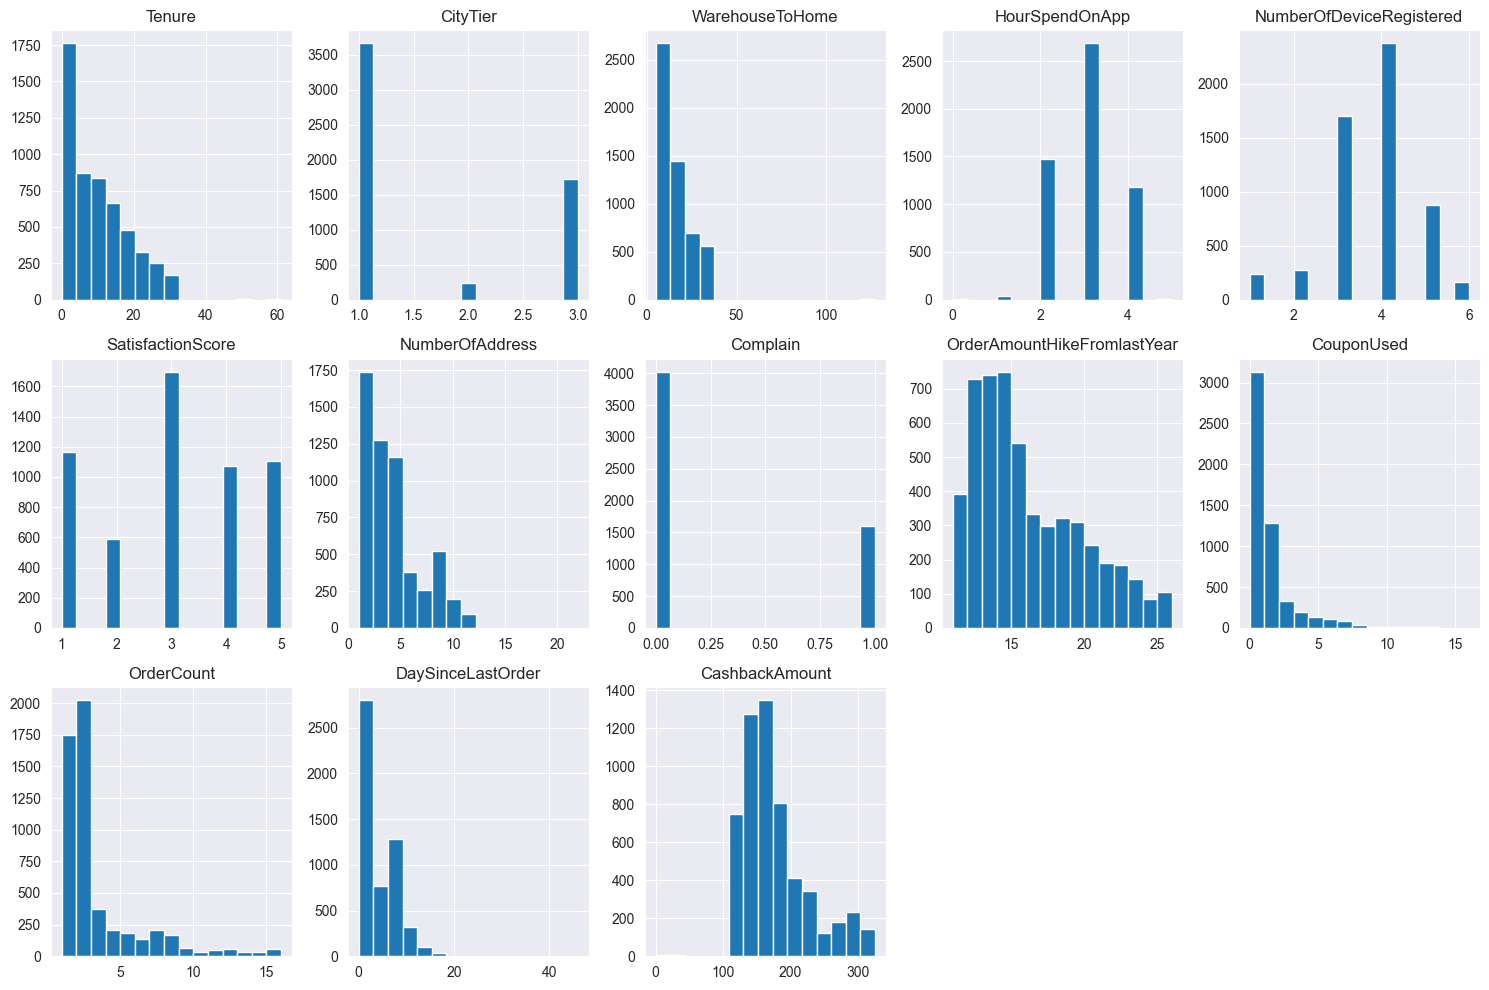

In [25]:
# a histogram grid plot of all numerical of the variables
import matplotlib.pyplot as plt
# List of columns to compare
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome',
                     'HourSpendOnApp', 'NumberOfDeviceRegistered',
                    'SatisfactionScore',  'NumberOfAddress',
                      'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                      'DaySinceLastOrder', 'CashbackAmount']
# Create a histogram grid
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.tight_layout()
plt.show()

In [26]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

HoursSpendOnApp is between 2 and 4 for every user? This data is not natural
CashbackAmount is also weird, almost always between 110 and 325
Not many Tier 2 cities
How can almost everyone have a hike from last year?
Days since last order suggests churn definition is monthly, either calender month or rolling? (Max is 31 days)

/Users/jkerlin/PycharmProjects/zoominfo_churn/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_65194/836951762.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_65194/836951762.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_65194/836951762.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabe

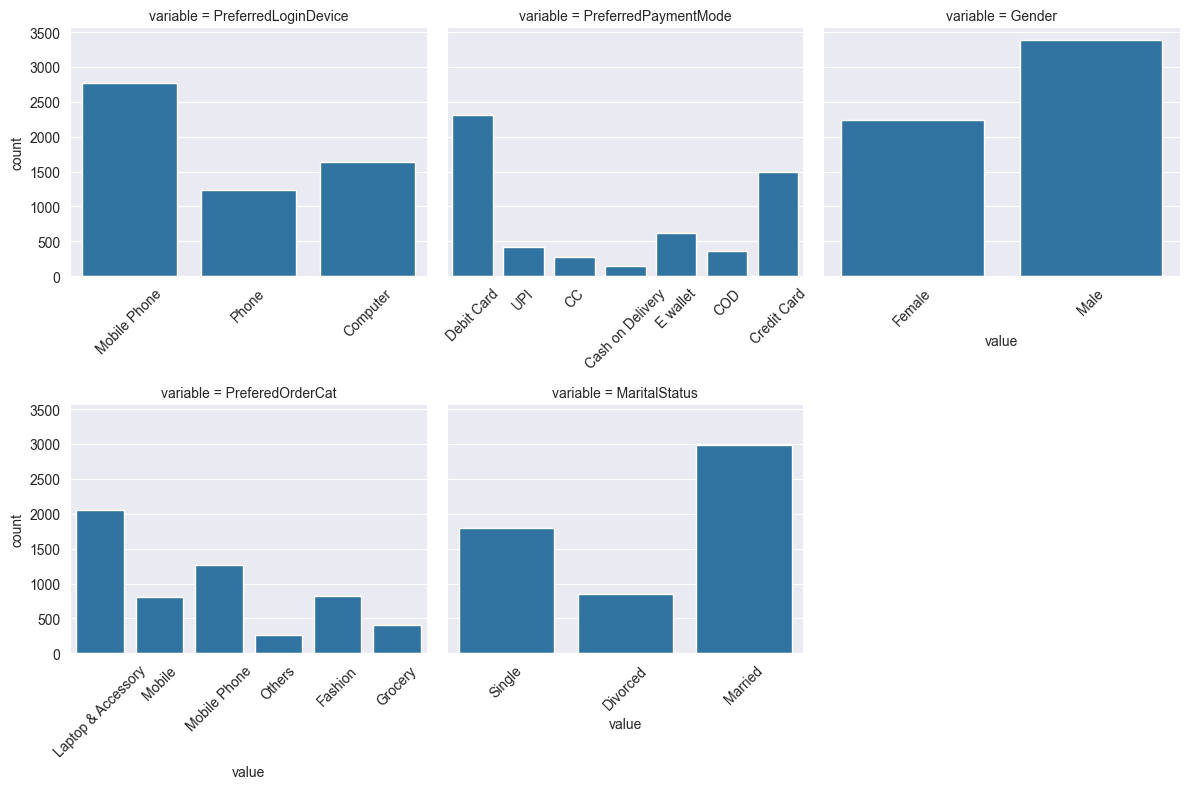

In [44]:
#A bar chart with the count of each category for each categorical variable by churn
import seaborn as sns

# List of columns to compare
categorical_columns = ['PreferredLoginDevice', 'CityTier',
 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','MaritalStatus','Complain']

# count grid plot for all of the categorical variables
# List of columns to compare
dfp = df.drop(numerical_columns, axis=1)
dfp = dfp.drop('CustomerID', axis=1)

# Melt the DataFrame
dfp = dfp.melt(id_vars='Churn', var_name='variable', value_name='value')

# Filter out the groups with a count of 0
dfp = dfp.groupby(['variable', 'value']).filter(lambda x: len(x) > 0)

# Create a count grid 
g = sns.FacetGrid(dfp, col='variable', col_wrap=3, height=4, sharex=False)
g.map(sns.countplot, 'value')

# Fix the x-axis labels to tilt 45 degrees
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)   

plt.tight_layout()

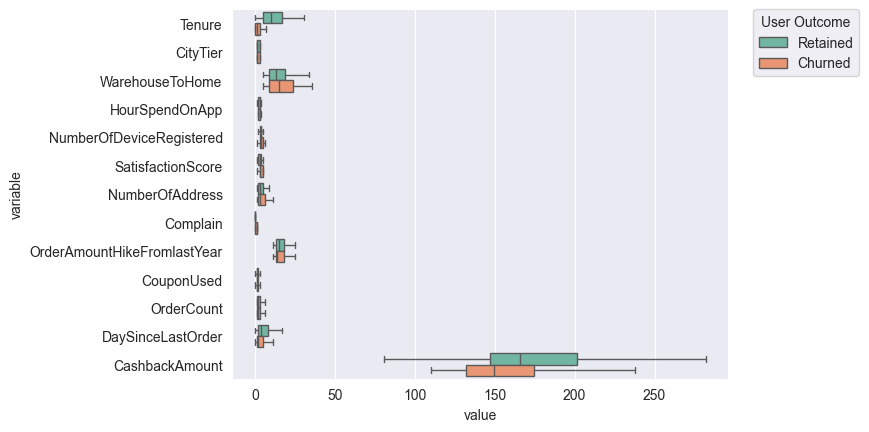

<Figure size 1000x800 with 0 Axes>

In [50]:
# Create a boxplot for each variable vs churn
# Melt the DataFrame

# List of columns to compare
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome',
                     'HourSpendOnApp', 'NumberOfDeviceRegistered',
                    'SatisfactionScore',  'NumberOfAddress',
                      'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                      'DaySinceLastOrder', 'CashbackAmount']

# Convert the DataFrame from wide format to long format
df_norm = df[numerical_columns + ['Churn']]

df_long = pd.melt(df_norm, id_vars='Churn', value_vars=numerical_columns)

# Create a boxplot for each variable
ax = sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="Churn", showfliers=False)

# Relabel the legend and move it out of the way
# Set the figure size
plt.figure(figsize=(10, 8))

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Retained', 'Churned'], title='User Outcome', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_65194/1201374115.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_65194/1201374115.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_65194/1201374115.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_65194/1201374115.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

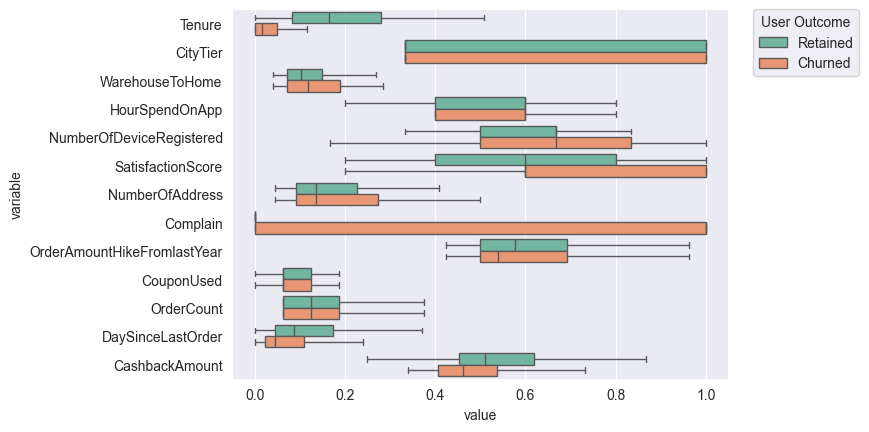

<Figure size 1000x800 with 0 Axes>

In [51]:
# Fix the x-axis labels to tilt 45 degrees
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
# Create a boxplot for each variable vs churn
# Melt the DataFrame

# List of columns to compare
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome',
                     'HourSpendOnApp', 'NumberOfDeviceRegistered',
                     'SatisfactionScore', 'NumberOfAddress',
                     'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                     'DaySinceLastOrder', 'CashbackAmount']

# Convert the DataFrame from wide format to long format
df_norm = df[numerical_columns + ['Churn']]
df_norm = df_norm.div(df_norm.max())

df_long = pd.melt(df_norm, id_vars='Churn', value_vars=numerical_columns)

# Create a boxplot for each variable
ax = sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="Churn", showfliers=False)

# Relabel the legend and move it out of the way
# Set the figure size
plt.figure(figsize=(10, 8))

legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Retained', 'Churned'], title='User Outcome', bbox_to_anchor=(1.05, 1), loc=2,
          borderaxespad=0.)
plt.show()

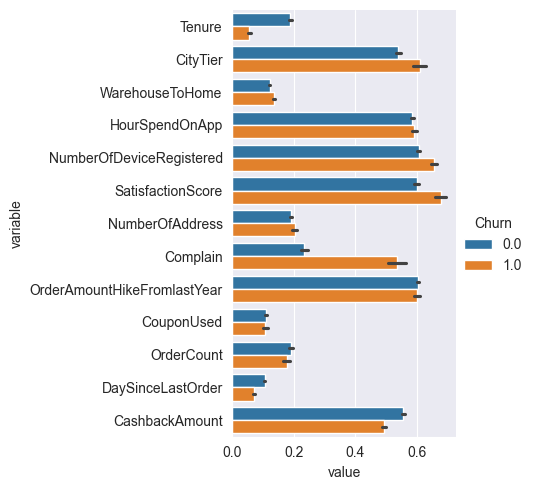

In [52]:
#Compare means
sns.catplot(x="value", y="variable", hue = "Churn", kind="bar", data=df_long)

Promising predictors:
- Tenure
- CityTier
- Complain 
- DaySinceLastOrder
- CashbackAmount

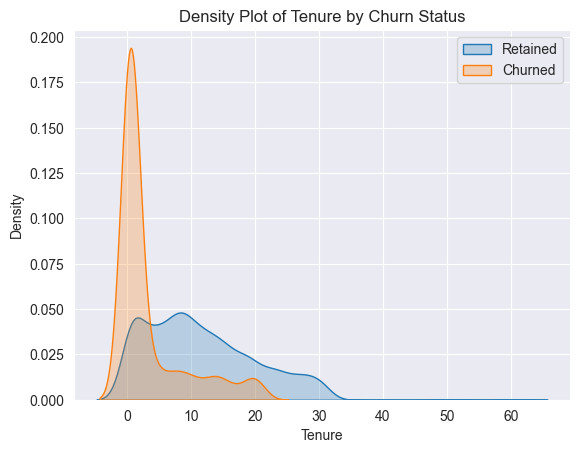

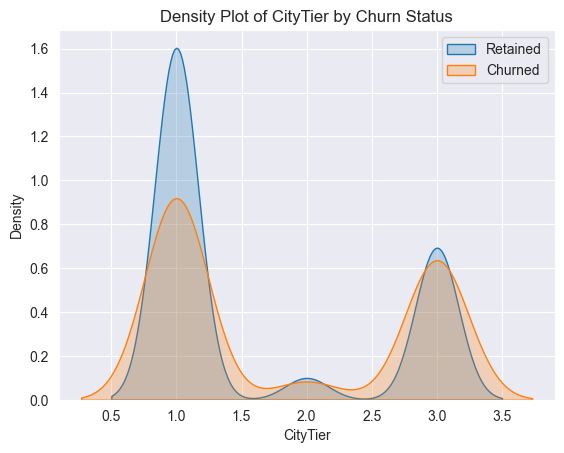

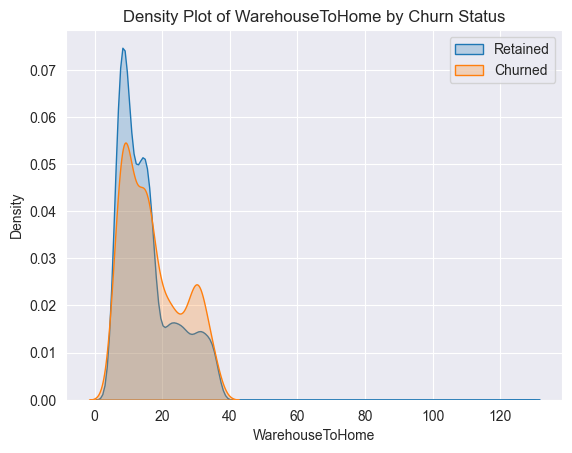

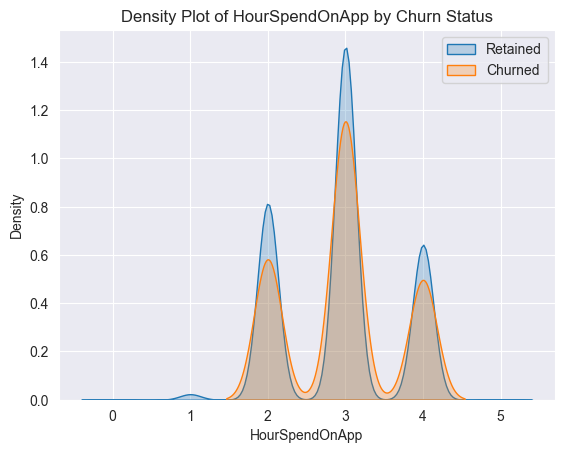

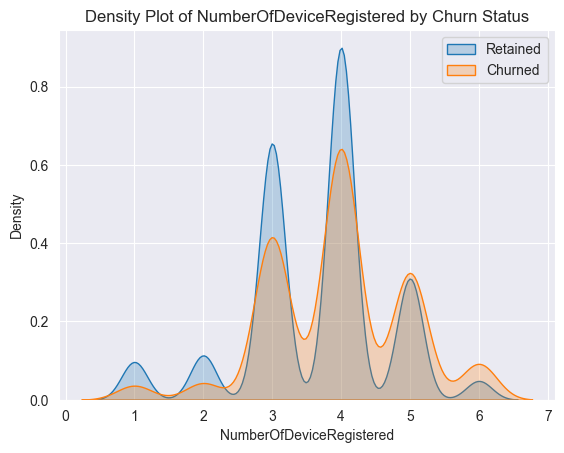

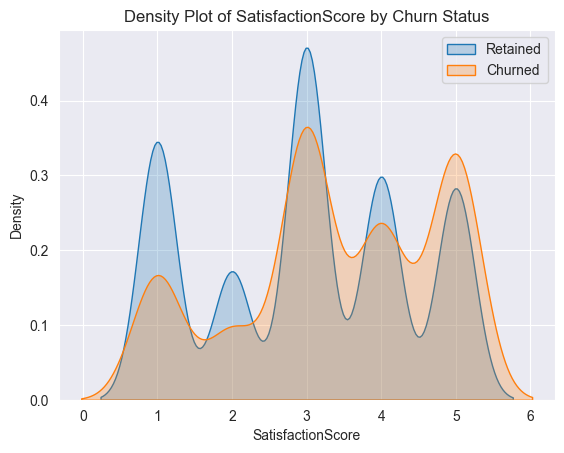

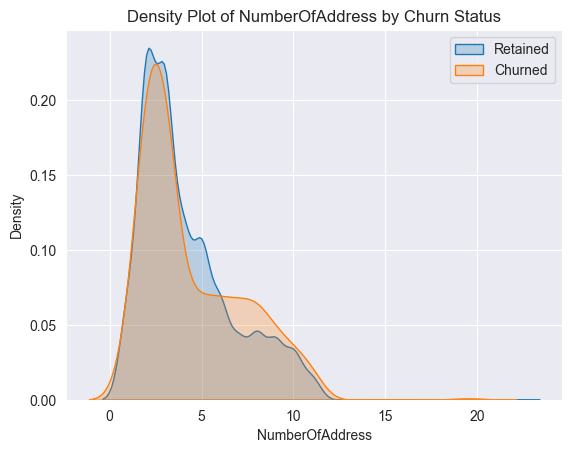

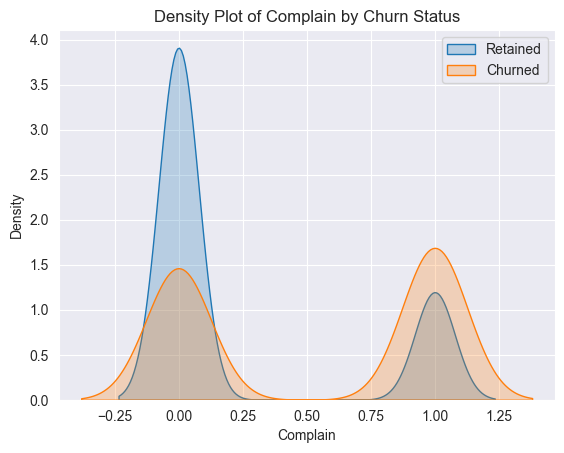

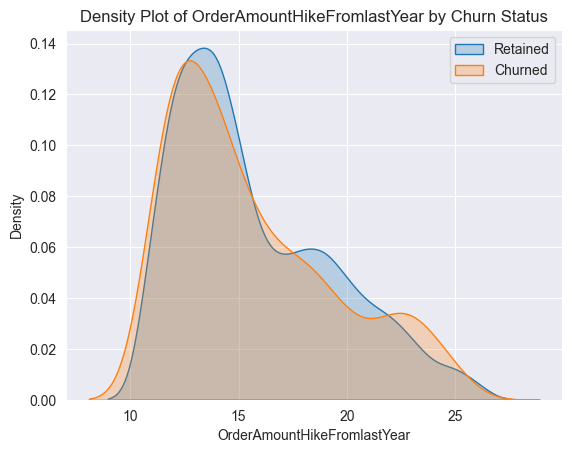

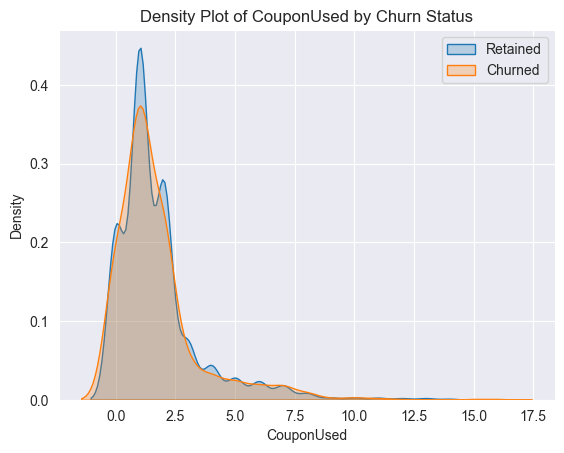

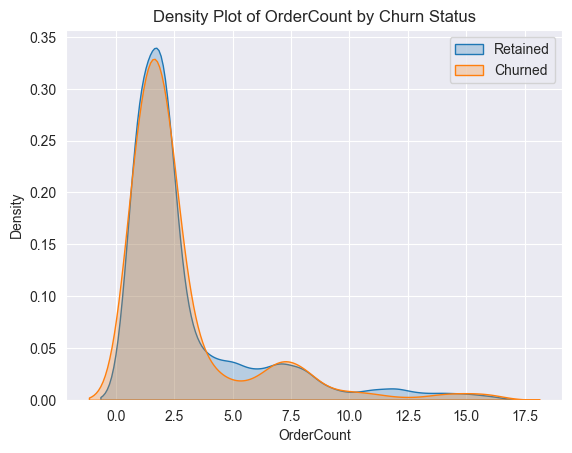

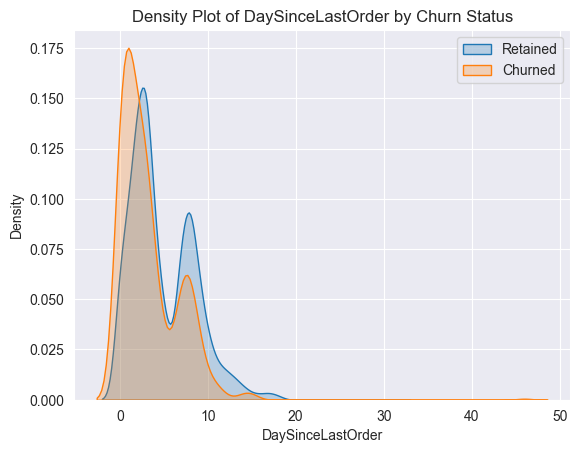

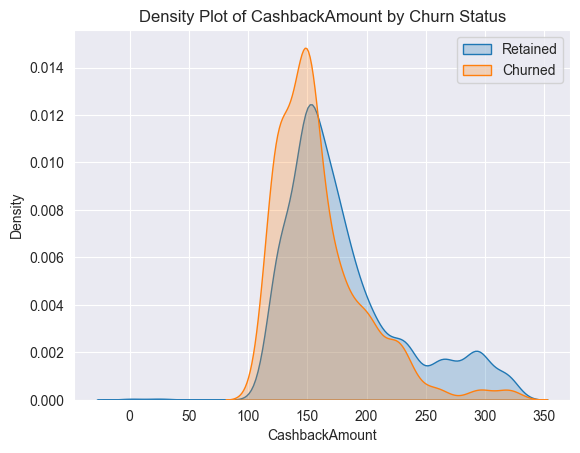

In [56]:
# make density plots for each variable by churn
# List of columns to compare
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome',
                     'HourSpendOnApp', 'NumberOfDeviceRegistered',
                     'SatisfactionScore', 'NumberOfAddress',
                     'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                     'DaySinceLastOrder', 'CashbackAmount']

for col in numerical_columns:
    # Create separate density plots for 'CashbackAmount' for each category of 'Churn'
    sns.kdeplot(data=df[df['Churn'] == 0][col], label='Retained', fill=True)
    sns.kdeplot(data=df[df['Churn'] == 1][col], label='Churned', fill=True)
    
    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Density Plot of ' + col + ' by Churn Status')
    
    # Add a legend
    plt.legend()
    
    # Display the plot
    plt.show()



Wow, tenure has very different distribution for churned vs not churned. Potential casuality?

In [57]:
df['TenureBin'] = df.apply(lambda x: 'Unknown' if pd.isnull(x['Tenure']) else ('New (0-1)' if x['Tenure'] <= 1 else 'Established (2+)'), axis=1)


Column: PreferredLoginDevice


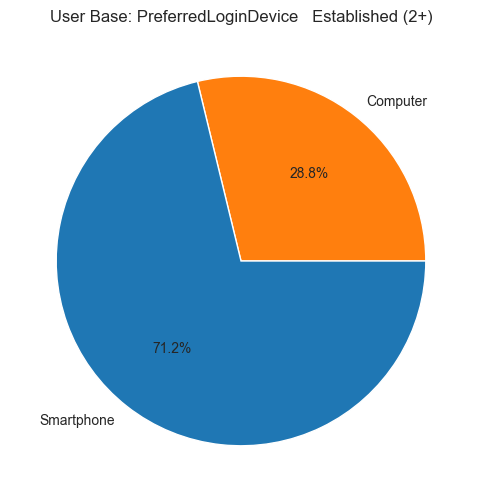


Column: PreferredLoginDevice


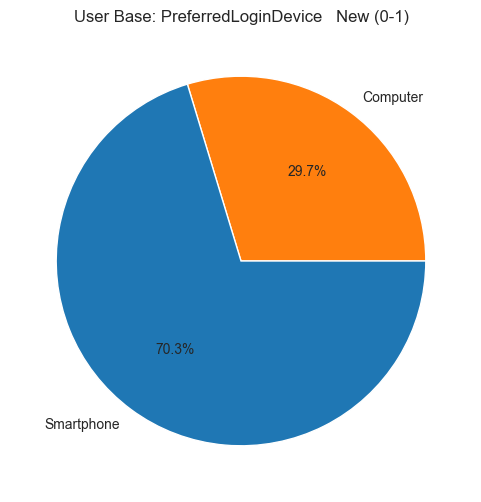


Column: PreferredPaymentMode


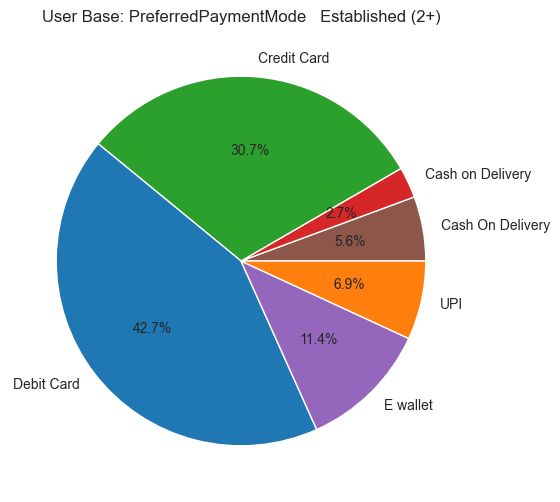


Column: PreferredPaymentMode


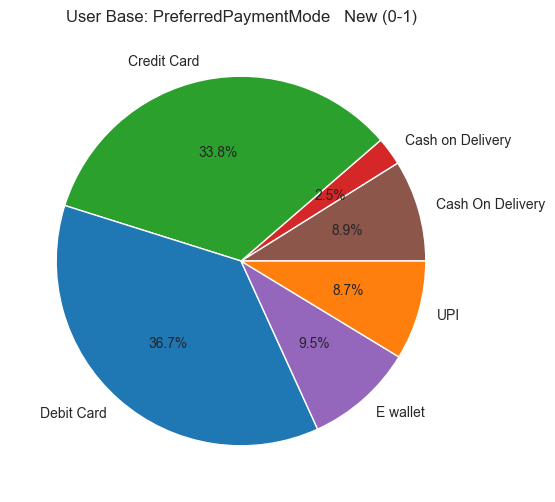


Column: Gender


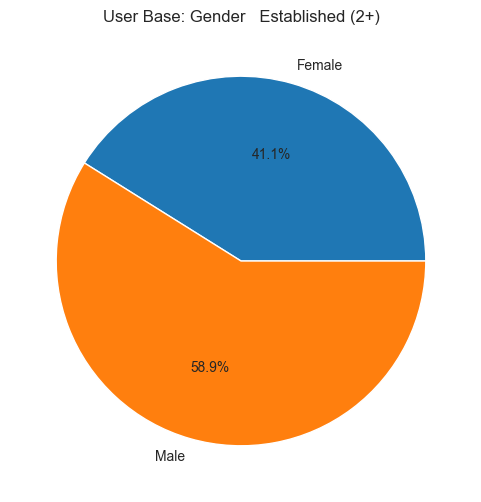


Column: Gender


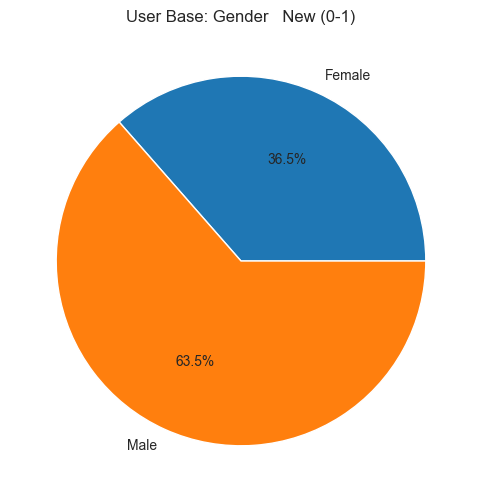


Column: PreferredOrderCat


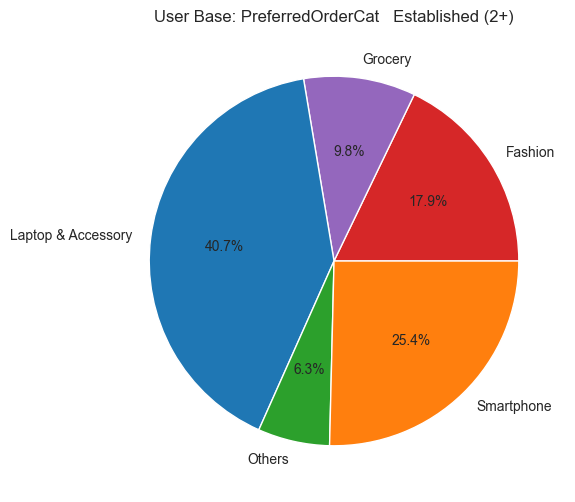


Column: PreferredOrderCat


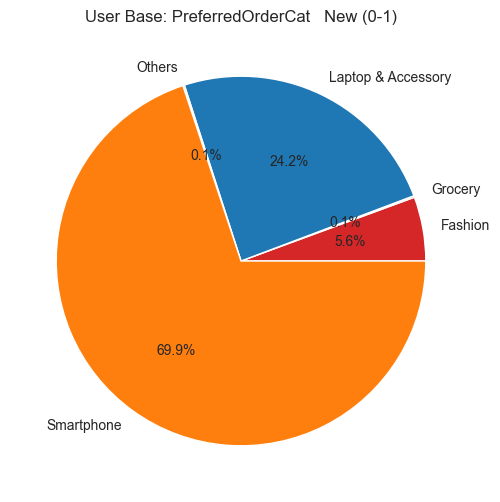


Column: MaritalStatus


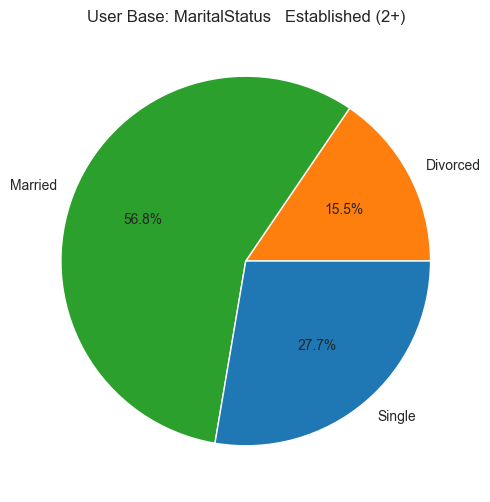


Column: MaritalStatus


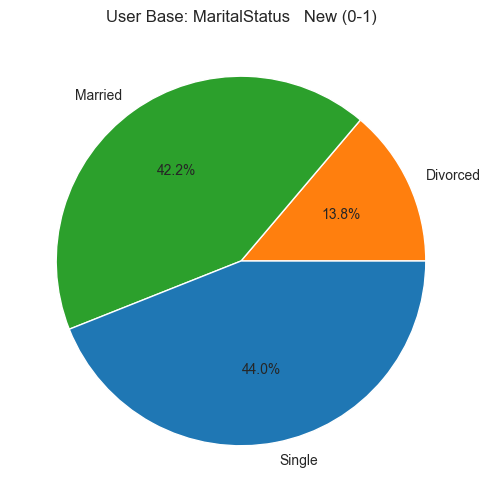


Column: TenureBin


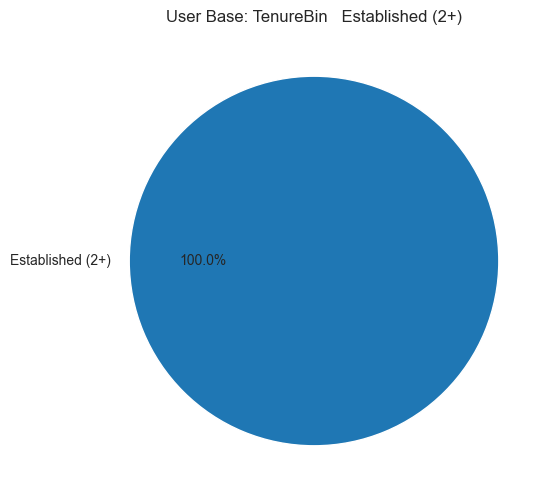


Column: TenureBin


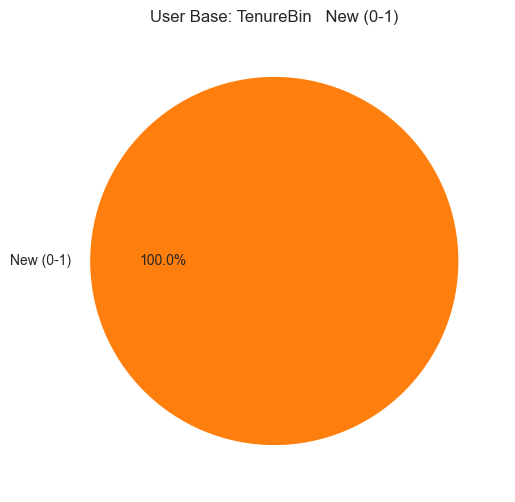

In [29]:
import matplotlib
import matplotlib.pyplot as plt

for col in df.columns:
    unique_values = df[col].unique()

    # Generate a list of unique colors
    colors = matplotlib.colormaps['tab10']
    
    # Create a dictionary mapping each unique value to a unique color
    color_dict = {value: colors(i) for i, value in enumerate(unique_values)}

    for cnt, tenure_bin in enumerate(df['TenureBin'].unique()):

        if df[col].dtype == 'object':
            print(f"\nColumn: {col}")
            
            percentages = df.loc[df['TenureBin'] == tenure_bin, col].value_counts(normalize=True).sort_index() * 100
            pie_colors = [color_dict[value] for value in percentages.index]

                    # Create a pie chart
            plt.figure(figsize=(6, 6))
            plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=pie_colors )
            plt.title(f'User Base: {col}   ' + tenure_bin)
            plt.show()


Churn - 1 is cancellation, 0 is retention? no, its e-comm, probably no sales for a month?   
Tenure - Probably months?  
Preferred Login Device - Mobile Phone, Phone, Computer... (combine Mobile Phone, Phone?)  
City Tier - 1 is probably the best  
Distance to Warehouse - Units?
Preferred Payment Method -  Merge CC and COD to Credit card and Cash On Delivery? 


Why is the distribution of the 3 Tenures Unknown (null) so different? More evidence of labeling error or a change in the product? 

Let's try to clean up the labeling

In [45]:
import pandas as pd

def load_data():
    """
    Load the data dictionary and the main dataset from an Excel file.

    Returns:
    tuple: a tuple containing the data dictionary and the main dataset
    """
    # Load the data dictionary
    data_dict = pd.read_excel(
        '../data/churn_data.xlsx', sheet_name='Data Dict', index_col=None, header=1
    )
    data_dict = data_dict.drop(data_dict.columns[0], axis=1)
    data_dict = data_dict.rename(columns={'Discerption':'Description'})

    # Load the main dataset
    df = pd.read_excel('../data/churn_data.xlsx', sheet_name='E Comm', header=0)

    return data_dict, df

def merge_cases(df, column, cases, new_case):
    """
    Merge all specified cases in a column into a single case.

    Parameters:
    df (pandas.DataFrame): The DataFrame to modify.
    column (str): The column in the DataFrame where the cases will be merged.
    cases (list): The cases in the column to be replaced.
    new_case (str): The new case that will replace the specified cases.

    Returns:
    pandas.DataFrame: The modified DataFrame with the merged cases.
    """
    for case in cases:
        df[column] = df[column].replace(case, new_case)
    return df

# preprocess the data

def preprocess_ecomm(df):
    df = df.rename(columns = {'PreferedOrderCat':'PreferredOrderCat'})
    
    # Merge the cases in the 'PreferredLoginDevice' column
    df = merge_cases(
        df,
        'PreferredLoginDevice',
        ['Mobile Phone', 'Phone'],
        'Smartphone'
    )
    
    # Merge the cases in the 'PreferredPaymentMode' column
    
    df = merge_cases(
        df,
        'PreferredPaymentMode',
        ['CC', 'Credit Card'],
        'Credit Card'
    )
    
    df = merge_cases(
        df,
        'PreferredPaymentMode',
        ['COD', 'Cash On Delivery'],
        'Cash On Delivery'
    )
    
    # Merge the cases in the 'PreferredOrderCat' column
    df = merge_cases(
        df,
        'PreferredOrderCat',
        ['Mobile Phone', 'Mobile'],
        'Smartphone'
    )
    
    df['TenureBin'] = df.apply(lambda x: 'New (0-1)' if pd.isnull(x['Tenure']) else ('New (0-1)' if x['Tenure'] <= 1 else 'Established (2+)'), axis=1)
    
    df['Tenure'] = df['Tenure'].fillna(-1)
    df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(-1)
    df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(-1)
    df['OrderCount'] = df['OrderCount'].fillna(-1)
    #fill remaining nas with mean
    df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())
    df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean())
    df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].mean())     
    return df


In [46]:
data_dict, df = load_data()
df = preprocess_ecomm(df)

df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureBin
0,50001,1,4.0,Smartphone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Established (2+)
1,50002,1,-1.0,Smartphone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,New (0-1)
2,50003,1,-1.0,Smartphone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,New (0-1)
3,50004,1,0.0,Smartphone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,New (0-1)
4,50005,1,0.0,Smartphone,1,12.0,Credit Card,Male,-1.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,New (0-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,1,Married,6,0,18.0,1.0,2.0,4.0,150.71,Established (2+)
5626,55627,0,13.0,Smartphone,1,13.0,Credit Card,Male,3.0,5,...,5,Married,6,0,16.0,1.0,2.0,-1.0,224.91,Established (2+)
5627,55628,0,1.0,Smartphone,1,11.0,Debit Card,Male,3.0,2,...,4,Married,3,1,21.0,1.0,2.0,4.0,186.42,New (0-1)
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,4,Married,4,0,15.0,2.0,2.0,9.0,178.90,Established (2+)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert categorical variables to dummies
df_dummies = pd.get_dummies(df, columns=['PreferredLoginDevice','Gender','MaritalStatus',],drop_first=True)
df_dummies = pd.get_dummies(df_dummies, columns=['PreferredPaymentMode',  'PreferredOrderCat'],drop_first=True)
# Split the data into training and testing sets
X = df_dummies.drop(columns=['Churn', 'CustomerID','TenureBin'])
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced')
#rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_count = 10
top_features = feature_importances.index[:feature_count]
rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced')
#rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train[top_features], y_train)
# Print the top 10 most important features
print(feature_importances)

# Make predictions
y_pred = rf.predict(X_test[top_features])

#Accuracy of the model
print(classification_report(y_test, y_pred))


                                       importance
Tenure                                   0.277069
CashbackAmount                           0.080558
Complain                                 0.072508
WarehouseToHome                          0.065234
NumberOfAddress                          0.057160
DaySinceLastOrder                        0.056066
OrderAmountHikeFromlastYear              0.049938
SatisfactionScore                        0.049924
PreferredOrderCat_Smartphone             0.028533
NumberOfDeviceRegistered                 0.028001
CityTier                                 0.027615
OrderCount                               0.027138
MaritalStatus_Single                     0.025714
CouponUsed                               0.024720
MaritalStatus_Married                    0.018868
HourSpendOnApp                           0.016959
PreferredLoginDevice_Smartphone          0.015251
PreferredPaymentMode_Credit Card         0.014905
Gender_Male                              0.014677


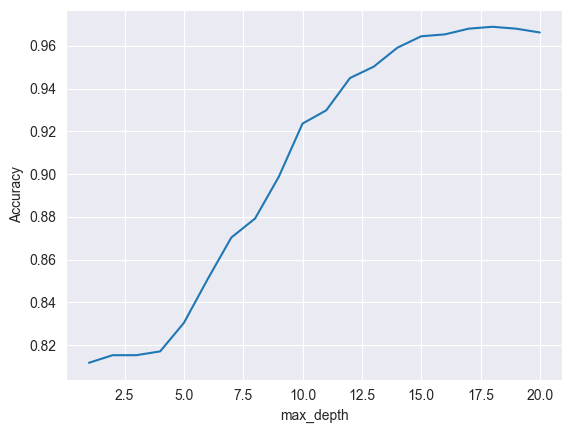

In [51]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define the range of max_depth values
max_depth_range = list(range(1, 21))
feature_counts = [10]
# List to store the average accuracies for each value of max_depth
accuracies = []

# Iterate over the max_depth values
for max_depth in max_depth_range:
    # Train the model
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, class_weight='balanced')
    rf.fit(X_train, y_train)

    feature_count = 10
    top_features = feature_importances.index[:feature_count]
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, class_weight='balanced')
    #rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train[top_features], y_train)
    # Make predictions
    y_pred = rf.predict(X_test[top_features])
    # Compute the accuracy and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot max_depth values vs accuracies
plt.plot(max_depth_range, accuracies)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

No real harm in leaving max depth untouched, maybe 17 is best

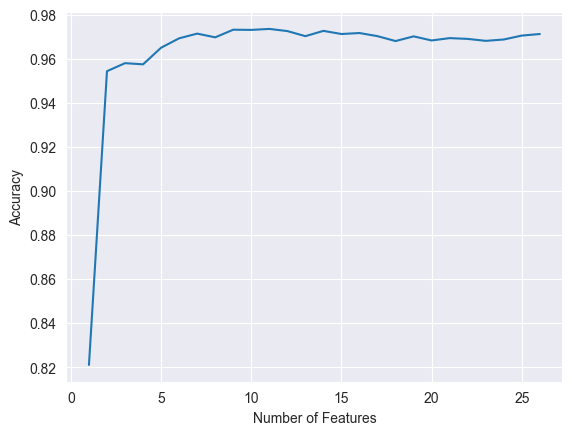

In [56]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np

# Define the range of feature counts
feature_counts = list(range(1, len(X.columns) + 1))

#Run each random seed 10 times and average the results
seed_accuracies = np.zeros((10, len(feature_counts)))
seed_macro_avg_accuracies = np.zeros((10, len(feature_counts)))



for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Train the model to get feature importances
    rf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
    rf.fit(X_train, y_train)
    
    # Get feature importances
    feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
    

    
    # List to store the average accuracies for each feature count
    accuracies = []
    macro_avg_accuracies = []

    # Iterate over the feature counts
    for feature_count in feature_counts:
        # Select the top features
        top_features = feature_importances.index[:feature_count]
        X_train_top = X_train[top_features]
        X_test_top = X_test[top_features]
    
        # Train the model
        rf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
        rf.fit(X_train_top, y_train)
    
        # Make predictions
        y_pred = rf.predict(X_test_top)
    
        # Compute the accuracy and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        macro_avg = f1_score(y_test, y_pred, average='macro')
        accuracies.append(accuracy)
        macro_avg_accuracies.append(macro_avg)
    
    seed_accuracies[seed,:] = accuracies
    seed_macro_avg_accuracies[seed,:] = macro_avg_accuracies
mean_acc = np.mean(seed_accuracies, axis = 0)
mean_macro_avg = np.mean(seed_macro_avg_accuracies, axis = 0)


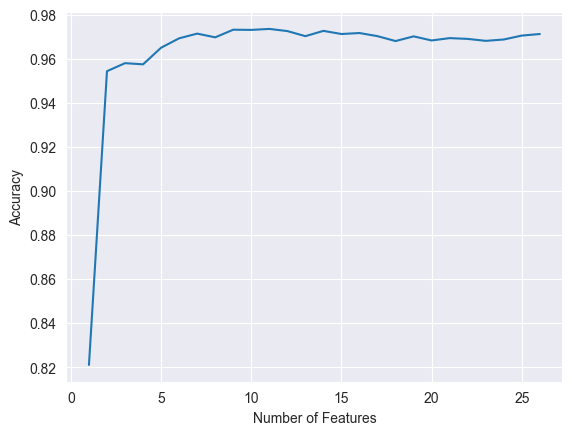

In [59]:
# Plot feature counts vs accuracies
plt.plot(feature_counts, mean_acc)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

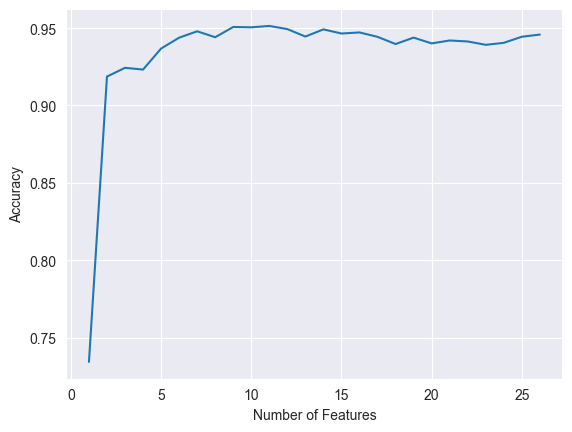

In [60]:
# Plot feature counts vs accuracies
plt.plot(feature_counts, mean_macro_avg)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

Balanced accuracy peaks at ~10 features. Did balancing to add a bit more weight to capturing the churned class

In [62]:
top10 = feature_importances.index[:10]

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert categorical variables to dummies
df_dummies = pd.get_dummies(df, columns=['PreferredLoginDevice','Gender','MaritalStatus',],drop_first=True)
df_dummies = pd.get_dummies(df_dummies, columns=['PreferredPaymentMode',  'PreferredOrderCat'],drop_first=True)
# Split the data into training and testing sets
X = df_dummies.drop(columns=['Churn', 'CustomerID','TenureBin'])
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=17, class_weight='balanced')
#rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_count = 10
top_features = feature_importances.index[:feature_count]
# Split the data into training and testing sets
X = df_dummies[top_features]
y = df_dummies['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

rf = RandomForestClassifier(n_estimators=100, max_depth=17, class_weight='balanced')
#rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# Print the top 10 most important features
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Make predictions
y_pred = rf.predict(X_test)

#Accuracy of the model
print(classification_report(y_test, y_pred))


                             importance
Tenure                         0.352934
CashbackAmount                 0.127281
WarehouseToHome                0.086310
DaySinceLastOrder              0.077750
Complain                       0.075039
NumberOfAddress                0.073439
OrderAmountHikeFromlastYear    0.067933
SatisfactionScore              0.055933
OrderCount                     0.043479
NumberOfDeviceRegistered       0.039902
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       933
           1       0.97      0.87      0.92       193

    accuracy                           0.97      1126
   macro avg       0.97      0.93      0.95      1126
weighted avg       0.97      0.97      0.97      1126



In [72]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Set the threshold to a lower value (e.g., 0.3)
threshold = 0.3

# Apply the threshold to the probabilities to get the final predictions
y_pred = (y_pred_proba >= threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       933
           1       0.86      0.97      0.91       193

    accuracy                           0.97      1126
   macro avg       0.93      0.97      0.94      1126
weighted avg       0.97      0.97      0.97      1126



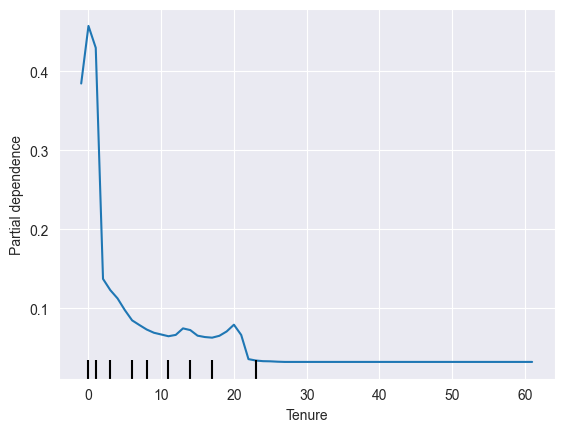

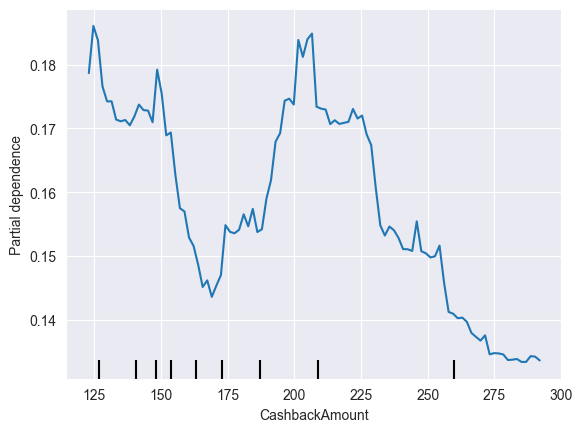

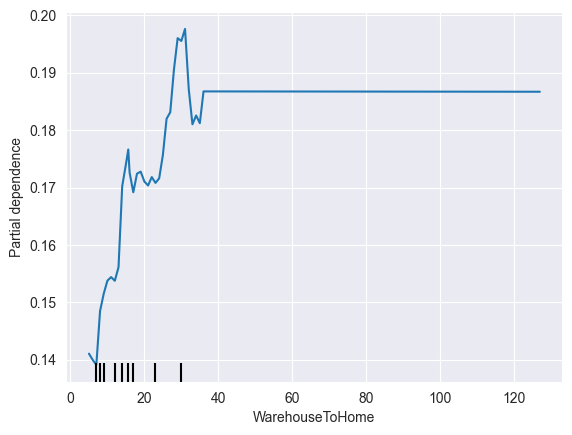

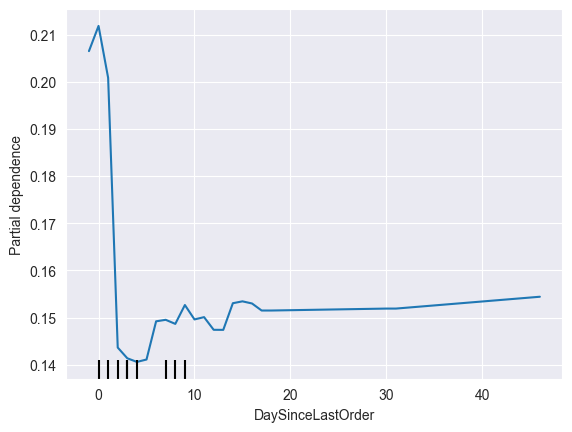

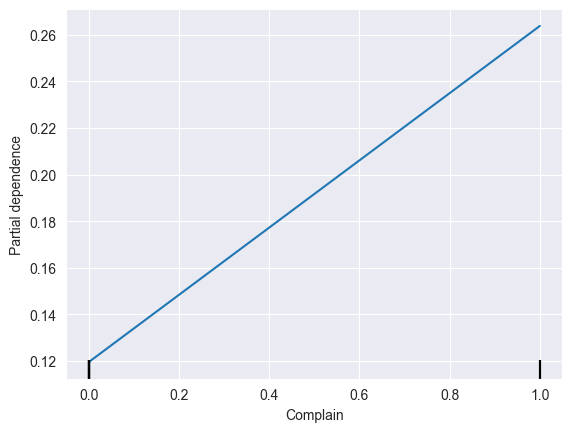

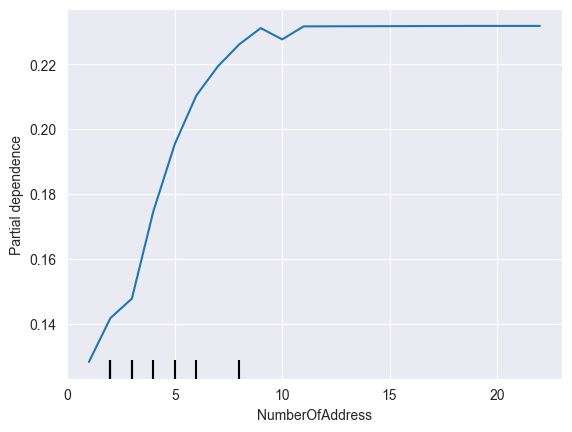

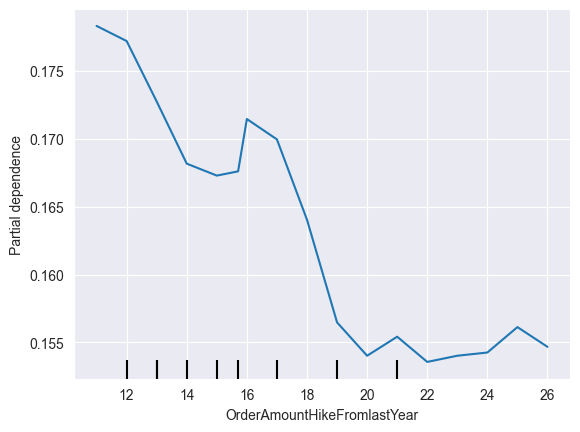

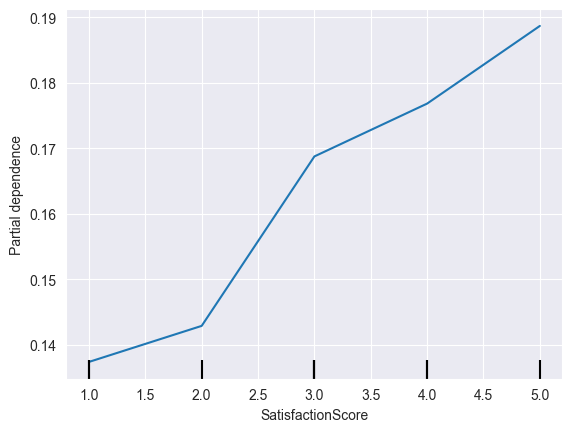

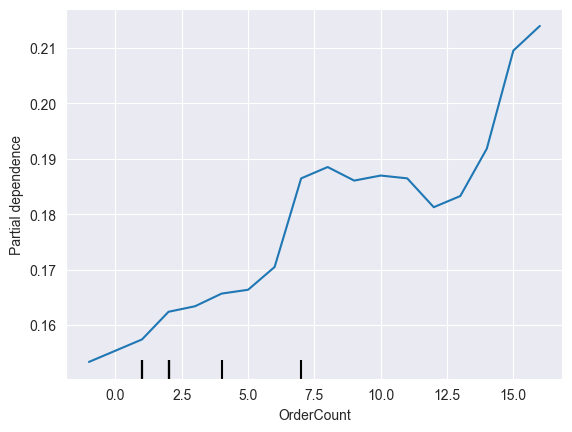

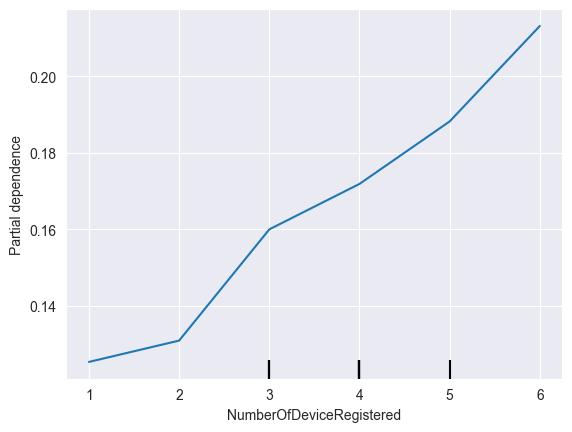

In [69]:
from sklearn.inspection import PartialDependenceDisplay
for col in feature_importances.index:
    PartialDependenceDisplay.from_estimator(rf, X,[col])

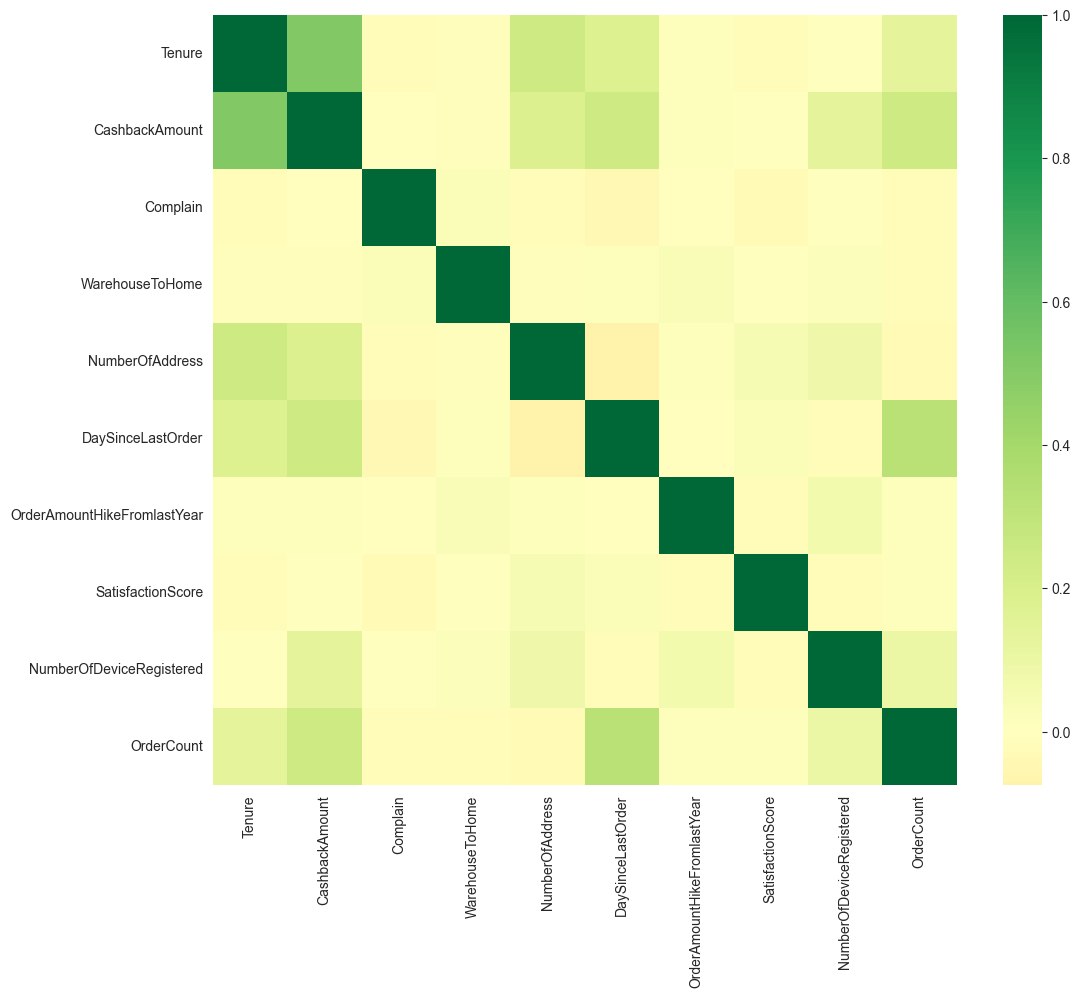

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=False, cmap='RdYlGn', center=0)
plt.show()

PreferredOrderCat   TenureBin       
Fashion             Established (2+)     744
                    New (0-1)             82
Grocery             Established (2+)     408
                    New (0-1)              2
Laptop & Accessory  Established (2+)    1696
                    New (0-1)            354
Others              Established (2+)     262
                    New (0-1)              2
Smartphone          Established (2+)    1058
                    New (0-1)           1022
dtype: int64


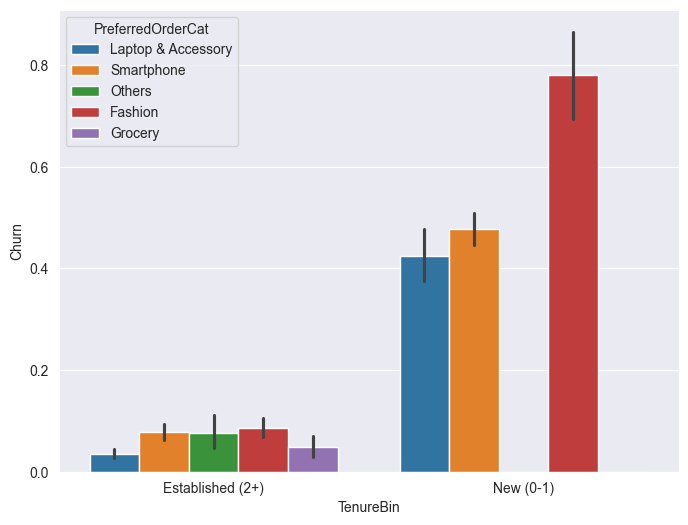

In [78]:
print(df.groupby(['PreferredOrderCat','TenureBin']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate

dfp = df.copy(deep=True)
# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='PreferredOrderCat', data=dfp, errorbar='ci')
plt.show()

PreferredOrderCat
Fashion                826
Grocery                410
Laptop & Accessory    2050
Others                 264
Smartphone            2080
dtype: int64


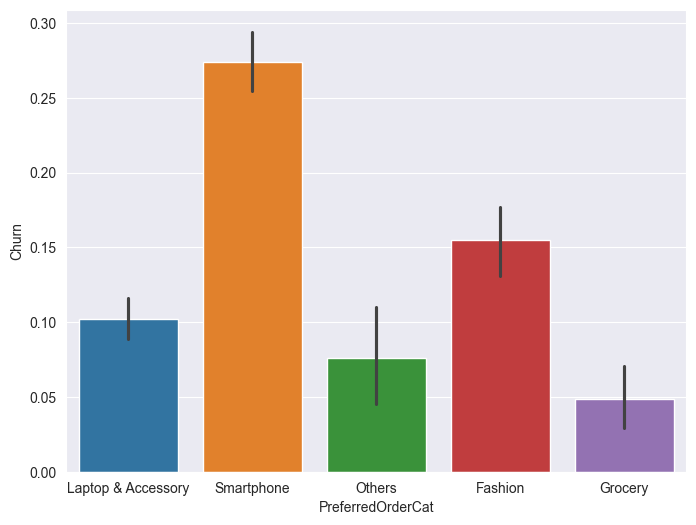

In [80]:
print(df.groupby(['PreferredOrderCat']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
#dfp = dft[(dft['PreferedOrderCat'] != 'Others') & (dft['PreferedOrderCat'] != 'Grocery')]
dfp = df.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='PreferredOrderCat', y='Churn', hue='PreferredOrderCat', data=dfp, errorbar='ci')
plt.show()